In [1]:
import pandas as pd
import numpy as np
import spacy
import gensim
from collections import Counter 
import sklearn.cluster
from sklearn.model_selection import KFold
import random
from scipy.spatial import distance
import time
from text_cleaning import TextCleaner

# Set of the random seed 
random.seed(0)

In [2]:
from hydra import initialize, compose

with initialize(version_base=None, config_path="conf"):
    cfg=compose(config_name="lsa_config.yaml")

In [3]:
# Data import
# Relative Path of the dataset, change for your dataset
dataset_name = "cpn120"
if dataset_name == "cpn27":
    data = pd.read_csv(cfg.path_data.cpn27, delimiter=",")
elif dataset_name == "cpn120":
    data = pd.read_csv(cfg.path_data.cpn120, delimiter=",")


Cln = TextCleaner(cfg.enviroment.nlp, cfg.enviroment.language)

In [4]:
start = time.time()
# Normalize of the features

func = Cln.stemming

for i in range(len(data)):
    # if you want to lemmatize change the function 'normalize()' to 'lemmatize()'
    data.iloc[i,1] = func(data.iloc[i,1])
end = time.time()

print("Execution time:", end-start)

Execution time: 113.80494999885559


In [5]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Counter of each word 
contador = CountVectorizer()
tf = contador.fit_transform(data.iloc[:,1])

# TF-IDF vectorizer
transf = TfidfTransformer()
tfidf = transf.fit_transform(tf)


In [6]:
from sklearn.decomposition import TruncatedSVD

# es el numero de codificaciones existentes
if dataset_name == "cpn27":
    numDim = cfg.params.cpn27.n_dim
elif dataset_name == "cpn120":
    numDim = cfg.params.cpn120.n_dim


# numDim = 33 # numero de conceptos
vocab = contador.get_feature_names_out()

lsa = TruncatedSVD(n_components=numDim, n_iter=100, random_state=cfg.params.random_state)
# U, Sigma, VT = np.linalg.svd(tfidf.toarray())
tfidf_lsa_data = lsa.fit_transform(tfidf)


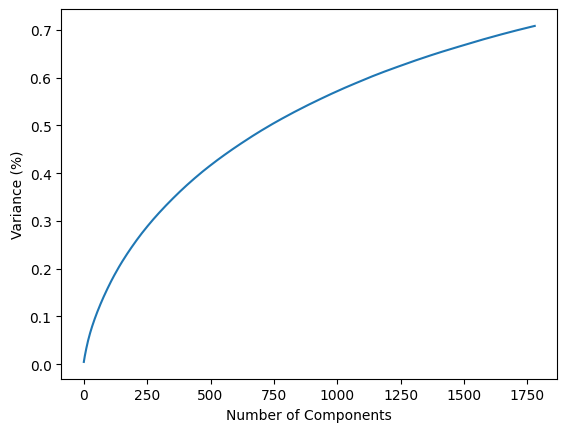

In [7]:
import matplotlib.pyplot as plt
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(lsa.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.savefig(cfg.path_results.grafics+'LSA_{}_{}.png'.format(dataset_name, func.__name__))